In [1]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [2]:
sequence_to_classify = "In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer."

# https://homes.cs.washington.edu/~nasmith/papers/card+boydstun+gross+resnik+smith.acl15.pdf
candidate_labels = [
    "Economic: costs, benefits, or other financial implications",
    "Capacity and resources: availability of physical, human or financial resources, and capacity of current systems",
    "Morality: religious or ethical implications",
    "Fairness and equality: balance or distribution of rights, responsibilities, and resources",
    "Legality, constitutionality and jurisprudence: rights, freedoms, and authority of individuals, corporations, and government",
    "Policy prescription and evaluation: discussion of specific policies aimed at addressing problems",
    "Crime and punishment: effectiveness and implications of laws and their enforcement",
    "Security and defense: threats to welfare of the individual, community, or nation",
    "Health and safety: health care, sanitation, public safety",
    "Quality of life: threats and opportunities for the individual’s wealth, happiness, and well-being",
    "Cultural identity: traditions, customs, or values of a social group in relation to a policy issue",
    "Public opinion: attitudes and opinions of the general public, including polling and demographics",
    "Political: considerations related to politics and politicians, including lobbying, elections, and attempts to sway voters",
    "External regulation and reputation: international reputation or foreign policy of the U.S.",
    "Other: any coherent group of frames not covered by the above categories",
]
res = classifier(sequence_to_classify, candidate_labels, multi_label=True)
res

{'sequence': 'In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer.',
 'labels': ['Security and defense: threats to welfare of the individual, community, or nation',
  'Capacity and resources: availability of physical, human or financial resources, and capacity of current systems',
  'Health and safety: health care, sanitation, public safety',
  'Economic: costs, benefits, or other financial implications',
  'Policy prescription and evaluation: discussion of specific policies aimed at addressing problems',
  'Quality of life: threats and opportunities for the individual’s wealth, happiness, and well-being',
  'Political: considerations related to politics and politicians, including lobbying, elections, and attempts to sway voters',
  'Public opinion: attitudes and opinions of the general public, including polling and demographics',
  'Fairness and equality: balance or distribution of rights, responsibilities, and resources',
  'Crime and punishment: effectivene

In [3]:
import numpy as np
indices_order = [res["labels"].index(l) for l in candidate_labels]
indices_order
scores_ordered = np.array(res["scores"])[indices_order].tolist()
scores_ordered

[0.750651478767395,
 0.8543342351913452,
 0.1413915604352951,
 0.2299410104751587,
 0.02103303000330925,
 0.38523077964782715,
 0.19217000901699066,
 0.9164594411849976,
 0.8374820351600647,
 0.37091076374053955,
 0.08417202532291412,
 0.24394731223583221,
 0.2827182710170746,
 0.05651986971497536,
 0.16099287569522858]

In [4]:
label_names = [l.split(":")[0].split(" ")[0] for l in candidate_labels]
label_names

['Economic',
 'Capacity',
 'Morality',
 'Fairness',
 'Legality,',
 'Policy',
 'Crime',
 'Security',
 'Health',
 'Quality',
 'Cultural',
 'Public',
 'Political',
 'External',
 'Other']

<BarContainer object of 15 artists>

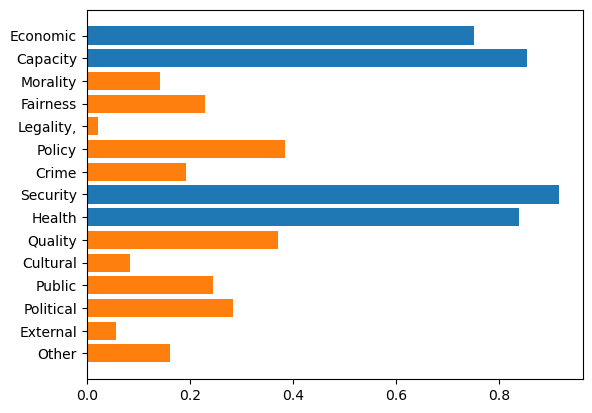

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cp = sns.color_palette()

colors = [cp[0] if s > 0.5 else cp[1] for s in scores_ordered]
plt.barh(label_names[::-1], scores_ordered[::-1], color=colors[::-1])